<a href="https://colab.research.google.com/github/Alikosemen/Learn-Python-Programming-Language/blob/main/Week_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# There are 4 data structures in Python. List, Tuple, Dictionary, Set

A = [100]  # Copy method is used in lists
B = A
C = A.copy()

print(id(A))
print(id(B))
print(id(C))

print(type(A))
print(type(B))
print(type(C))

132866802936192
132866802936192
132866802843392
<class 'list'>
<class 'list'>
<class 'list'>


In [ ]:
D = 100
print(type(D))

<class 'int'>


In [ ]:
# Let's we demonstrate, how you can count instance with class attributes

class C:
  counter = 0
  def __init__(self):
    type(self).counter += 1

  def __del__(self):            # The method will delete the specified object
    type(self).counter -= 1     # When it deletes the object, it will decrement the counter value

x = C()
print("Number of instances: " + str(C.counter))
y = C()
print("Number of instances: " + str(C.counter))
del x
print("Number of instances: " + str(C.counter))
del y
print("Number of instances: " + str(C.counter))

Number of instances: 1
Number of instances: 2
Number of instances: 1
Number of instances: 0


In [ ]:
"""
We used class attributes as public attributes in the previous section.
Of course, we can make public attributes private as well. We can do this by adding the 'double underscore'.
If we do so, we need a possibility to acces and change these private class attributes.
We could use instance methods for this purpose
"""

class Robot:
  __counter = 0  # This is an attribute just like the normal counter variable we used in the previous week
  def __init__(self):
    type(self).__counter += 1

  def RobotInstances(self):
    return Robot.__counter

x = Robot()
print(x.RobotInstances())
y = Robot()
print(x.RobotInstances())

1
2


In [ ]:
class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  def RobotInstances(self):
    return Robot.__counter

A = Robot()
print(A.__counter)  # We get error --> AttributeError: 'Robot' object has no attribute '__counter' Because __counter variable is a private variable. We can't acces directly. So we accessed it with the method in the code above

AttributeError: 'Robot' object has no attribute '__counter'

In [ ]:
# I wanted to show wrong accesses

class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  def RobotInstances(self):
    return Robot.__counter

A = Robot()
print(Robot.__counter)

AttributeError: type object 'Robot' has no attribute '__counter'

In [ ]:
"""
In Python, when you reference a method without parentheses, you get a bound method object, which is what this output represents.
A bound method is essentially a method combined with an object, waiting to be called.
The part <__main__.Robot object at 0x7cacc76a12a0> indicates that this method is bound to an instance of Robot that is located at the memory address 0x7cacc76a12a0
"""

class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  def RobotInstances(self):
    return Robot.__counter

A = Robot()
print(A.RobotInstances)

<bound method Robot.RobotInstances of <__main__.Robot object at 0x7cacc76a12a0>>


In [ ]:
class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  def RobotInstances(self):
    return Robot.__counter

A = Robot()
print(A.RobotInstances())  # To actually call the method and get the number of instances of the Robot class, you need to use parentheses to invoke the method, like so

1


In [ ]:
class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  def RobotInstances(self):
    return Robot.__counter

A = Robot()

print(Robot.RobotInstances())

"""
When you attempt to call the RobotInstances method directly on the class Robot with the syntax Robot.RobotInstances(),
Python expects you to manually provide an instance of the Robot class as the first argument, which corresponds to the self parameter within the method definition.
Since RobotInstances is an instance method, not a class method or static method, it requires an instance of the class to operate on
"""

TypeError: Robot.RobotInstances() missing 1 required positional argument: 'self'

In [ ]:
class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  def RobotInstances(self):
    return Robot.__counter

A = Robot()

"""
By passing A here, you're manually providing the self argument that the method expects.
A is an instance of Robot, so this satisfies the method's requirement for an instance through which it can access instance attributes
Explicitly pass an instance to the method when calling it from the class, which is generally not recommended (It is recommended to use @classmethod. We'll cover later inşAllah) in this context but technically possible
"""

"""
Modify the method to be a class method, which is designed to be called on the class rather than instances.
This involves using the @classmethod decorator and accepting a cls parameter instead of self.
The method can then reference class variables directly or perform actions that affect the class as a whole, rather than individual instances
"""
print(Robot.RobotInstances(A))



1


In [ ]:
class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  def RobotInstances(self):
    return Robot.__counter

A = Robot()

print(Robot.RobotInstances())

"""
The solution lies in static methods, which don't need a reference to an instance
"""

TypeError: Robot.RobotInstances() missing 1 required positional argument: 'self'

In [ ]:
class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  @staticmethod
  def RobotInstances():
    return Robot.__counter

print(Robot.RobotInstances()) # We printed the same expression above, but we did not get an error because we defined the method as static
x = Robot()
print(x.RobotInstances())
y = Robot()
print(x.RobotInstances()) # You can use instead of y.RobotInstances(). Doesn't matter.

0
1
2


In [ ]:
# If a class can use its own method, we call it class method.
# We call the method with the name 'cls'

# Objects call methods. If the class calls the method, we write cls in front of it.

"""
Static methods shouldn't be confused with class methods.
Like static methods class methods are not bound to instances, but unlike static methods class methods are bound to a class.
The first parameter of a class method is a reference to a class, i.e a class object.
They can be called via an instance of the class name
"""

"""
Class method is defined to describe the methods used by the class. Static method is described for accessing.
"""

class Robot:
  __counter = 0
  def __init__(self):
    type(self).__counter += 1

  @classmethod
  def RobotInstances(cls):
    return cls, Robot.__counter

print(Robot.RobotInstances())
x = Robot()
print(x.RobotInstances())
y = Robot()
print(x.RobotInstances())

(<class '__main__.Robot'>, 0)
(<class '__main__.Robot'>, 1)
(<class '__main__.Robot'>, 2)


In [ ]:
"""
We have defined a static gcd function to calculate the greatest common divisor of two numbers.
The greatest common divisor (gcd) of two or more integers (at least one of which is not zero),
is the largest positive integer that divides the numbers without a remainder
"""

"""
We are producing a class called fraction. We take an object type parameter in the class (This is the first time we've ever done this. I'll explain it in a moment) and define the init function.
Two parameters are needed. We need to reduce the numerator and denominator (numerator n, denominator d) with the help of a function to find the greatest common divisor.
Because when we say 25 / 10 (reduced version 5/2), we normally do this to find the greatest common divisor of 5.
The reduced function finds the largest common divisor and returns it as a value.
There is a structure here, a function that finds the largest common divisor.
There is another function that takes its result and uses it, performs an operation and gives us an answer.
We are now seeing how a function uses another function inside each other.
We are using a static method here because the class will use a method and we will use that method while doing the actual operation.
"""

"""
Static methods are the methods that are called, class methods are the methods that call them. Both are managed by the class, not the object. Class methods are called with cls.
"""

class fraction(object):

  def __init__(self, n, d):
    self.numerator, self.denominator = fraction.reduce(n, d)

  @staticmethod
  def gcd(a, b):
    while b!= 0:      # With the help of a loop, we take a and b as input as long as the remainder is not 0, we send b each time and we get the mode of a according to b. If b is not different from 0, it is done continuously. When b is zero, a becomes our greatest common divisor.
      a, b = b, a%b
    return a

  @classmethod
  def reduce(cls, n1, n2):
    g = cls.gcd(n1, n2)   # call class's function
    return (n1 // g, n2 // g)

  def __str__(self):  # We specifically updated the str function so that it can output attributes when we want to print objects. We can see the result with the attributes of the objects. That's why we used the str function.
    return str(self.numerator) + '/' + str(self.denominator)

"""
There is no self but cls in reduce method.
What does this mean? Only the class can call and use it.
In solving this problem, we use the result of another function in another function. Since that other function we will use will only be used by the class, we define it with classmethod.
"""

"""
Why didn't we make the gcd method as a classmethod because this is the auxiliary function we use,
the reduce function can use this auxiliary function.
Then we define it, take and use n1 and n2 values ​​as parameters with the help of the function we defined with the static method that comes from the class, that is, used by the class.
"""

"""
Did anything catch your attention? There is nothing that calls __str__, how did this happen automatically?
Because the class directly used the object itself.
That's why the outputs are inside the object. If the output is inside the object, __str__ works automatically when we print the object.
"""

x = fraction(8, 24)
print(x)
# print(x.a) When you remove this comment line you will get an error. Why? The object you produce from this class does not have such an attribute. a located in the static method. Only the classmethod can access it in the class


1/3


In [ ]:
def gcd(a, b):
    while b!= 0:
      a, b = b, a%b  # Here, comma-separated values ​​are equal to comma-separated values ​​on the other side of the equation.
    return a

print(gcd(25,10))
print(gcd(24,8))

5
8


In [ ]:
class P:

  def __init__(self, x):
    self.set_x(x)

  def get_x(self):
    return self.__x

  def set_x(self, x):
    if x < 0:
      self.__x = 0
    elif x > 1000:
      self.__x = 1000
    else:
      self.__X = x

p1 = P(1001)
print(p1.get_x())
p1.x = 1001
print(p1.x)  # This line adds a new property named x to object p1 and sets its value to 1001. This is not directly related to the __x property

# The photo below is a visualization of this code

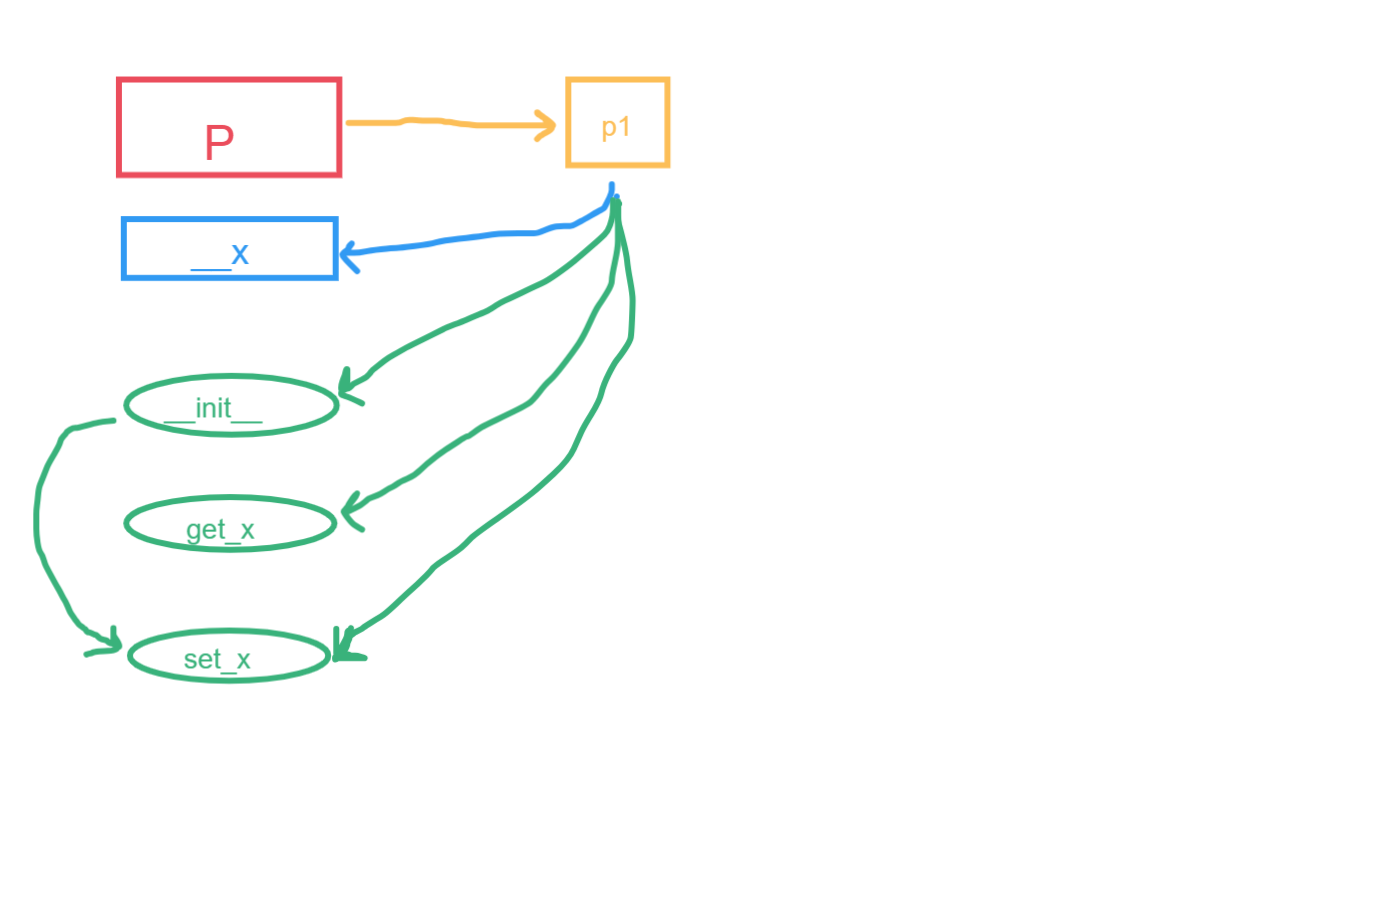

In [ ]:
"""
A method which is used for getting a value is decorated with @property, i.e we put this line
directly in front of the header. The method which has to function as the setter is decorated with @x.setter.
If the function had been called "f", we would have to decorate it with @f.setter"
"""

class P:

  def __init__(self, x):
    self.x = x   # The object does not need to call any set_x function because we use this property when taking x. Property says take self.__x and find that __x with a setter.

  @property
  def x(self):
    return self.__X

  @x.setter   # where x is the name of the above function. setter is the function that sets this (sets its value).
  def x(self, x):
    if x < 0:
      self.__X = 0
    elif x > 1000:
      self.__X = 1000
    else:
      self.__x = x




p1 = P(1001) # The value given when creating the object is 1001
print(p1.x)
p1.x = 1001 # Here we manually change the x attribute of the p1 object. But the result is 1000 again. Because our manual change goes to properties. It says take x inside with the property setter
print(p1.x)

"""
As an example of daily use, let's say we want calendar information from the user. The user cannot type 13 (there are 12 months). In such a case, for example,  we can get the mode in the property.
"""

1000
1000


In [ ]:
"""
Ecxeptions enable our program to continue on its way without being interrupted in the face of undesirable situations
"""

"""
An exception is an event that occurs during the execution of programs
that disrupt the normal flow of execution (e.g., KeyError Raised when a key is not found in a dictionary)
An exception is a Python object that represents an error
"""

"""
In Python, an exception is an object derives from the BaseException class that
contains information about an error event that occurred within a method. Exception object contains:

* Error type (exception name)
* The state of the program when the error occurred
* An error message describes the error event
"""

"""
Exception are useful to indicate different types of possible failure condition.

For example, below are the few standart exceptions

* FileNotFoundException
* ImportError
* RuntimeError
* NameError
* TypeError
"""


"""
Why use Exception

* Standardized error handling: Using built-in exceptions or producing a custom exception
with more precise name and description, you can adequately define the error event which
helps you debug the error event

* Cleaner code: Execeptions separate the error-handling code from regular code, which helps us
to maintain large code easily

* Robust application: With the help pf exceptions, we can develop a solid application, which can
handle error event efficiently

* Exceptions propagation: By default, the exception propagates the call stack if you don't catch it.
For example, if any error event occurred in a nested function, you do not have to explicitly catch-and forward it;
automatically, it gets forwarded to the calling function where you can handle it

* Different error types: Either you can use built-in exception or produce your custom exception and group them
by their generalized parent class, or differentiate errors by their actual class
"""

"""
Built-in Exceptions

Python automatically generates many exceptions and errors. Runtime exceptions, generally a result of
programming errors, such as:

* Reading a file that is not present
* Trying to read data outside the avaliable index of a list
* Dividing an integer value by zero
"""

In [ ]:
"""
When an exception occurs , Python stops the program execution and generates an expection message. It is highly recommended to handle exceptions.
The doubtful code that may raise an exception is called risky code
"""

try:
  # statements in try block
except:
  #executed when exception occurred in try block

In [6]:
a = 10
b = 0
c = a / b
print ("a/b = ",c)

# If we do not want to see this error, we should use try-except


ZeroDivisionError: division by zero

In [2]:
try:
  a = 10
  b = 0
  c = a/b
  print("The answer of a divide by b:", c)

except:
  print("Can't divide with zero. Provide different number")

Can't divide with zero. Provide different number


In [3]:
try:
  a = int(input("Enter value of a:"))  # this is how we get the value from the user in Python. By default, string type values ​​are received from the user. You should put it at the beginning of whatever type of value you want to get.
  b = int(input("Enter value of b:"))
  c = a/b
  print("The answer of a divide by b:", c)
except ValueError:
  print("Entered value is wrong")
except ZeroDivisionError:
  print("Can't divide by zero")

Enter value of a:10
Enter value of b:0
Can't divide by zero


In [4]:
try:
  a = int(input("Enter value of a:"))  # this is how we get the value from the user in Python. By default, string type values ​​are received from the user. You should put it at the beginning of whatever type of value you want to get.
  b = int(input("Enter value of b:"))
  c = a/b
  print("The answer of a divide by b:", c)
except ValueError:
  print("Entered value is wrong")
except ZeroDivisionError:
  print("Can't divide by zero")

Enter value of a:TEN
Entered value is wrong


In [5]:
try:
  a = int(input("Enter value of a:"))
  b = int(input("Enter value of b:"))
  c = a / b
  print("The answer of a divide by b:", c)
except(ValueError, ZeroDivisionError):
  print("Please enter a valid value")

Enter value of a:10
Enter value of b:0
Please enter a valid value


In [ ]:
# Python provides the finally block, which is used with the try block statement. The finally block is used to write a block of code that must execute, whether the try block raises an error or not

try:
  # block of code
  # this may throw an exception
finally:
  # block of code
  # this will always be executed
  # after the try and any except block

In [8]:
try:
  a = int(input("Enter value of a:"))
  b = int(input("Enter value of b:"))
  c = a / b
  print("The answer of a divide by b:", c)
except ZeroDivisionError:
  print("Can't divide with zero")
finally:
  print("Inside a finally block")

Enter value of a:20
Enter value of b:5
The answer of a divide by b: 4.0
Inside a finally block


In [ ]:
"""
Sometimes we might want to run a specific block of code. In that case, we can use else block
with the try-except block. The else block will be executed if and only if there are no exception is the try block.
For these cases, we can use the optional else statement with the try statement
"""

try:
  # block of code
except Exception:
  # block of code
else:
  # this code executes when exceptions not occurred


In [9]:
try:
  a = int(input("Enter value of a:"))
  b = int(input("Enter value of b:"))
  c = a / b
  print("a/b =",c)
except ZeroDivisionError:
  print("Can't divide by zero")
else:
  print("We are in else block")

Enter value of a:20
Enter value of b:4
a/b = 5.0
We are in else block


In [10]:
try:
  a = int(input("Enter value of a:"))
  b = int(input("Enter value of b:"))
  c = a / b
  print("a/b =",c)
except ZeroDivisionError:
  print("Can't divide by zero")
else:
  print("We are in else block")

Enter value of a:20
Enter value of b:0
Can't divide by zero


In [15]:
def simple_interest(amount, year, rate):
  try:
    if rate > 100:
      raise ValueError(rate)
    interest = (amount * year * rate) / 100
    print("The Simple Interest is", interest)
    return interest
  except ValueError:
   print("interest rate is out of range", rate)

print("Case 1")
simple_interest(800, 6, 8)
print("Case 2")
simple_interest(800, 6, 800)

Case 1
The Simple Interest is 384.0
Case 2
interest rate is out of range 800


In [ ]:
"""
The special syntax *args in function definitions in Python is used to pass a variable number of
arguments to a function. It is used to pass a non-keyworded, variable-length argument list
"""

# We use it when the number of arguments we take as parameters is not fixed

"""
The syntax is to use the symbol * to take in a variable number of arguments; by convention, it is
often used with the word args

What *args allows you to do is take in more arguments than the number of formal arguments that
you previously defined. With *args, any number of extra arguments can be tacked on to your
current formal parameters (including zero extra arguments)

For example, we want to make multiply function that takes any number of arguments and is able to
multiply them all together. It can be done using *args

Using the *, the variable that we associate with the * becomes iterable meaning you can do things
like iterate over it, run some higher-order functions such as map and filter, etc.

*args receives arguments as a tuple

The difference between **kwargs and *args is that **kwargs takes a dictionary as an argument.
"""

In [16]:
def myFunction(*arguments):
  for arg in arguments:
    print(arg)

myFunction("Hello", "Welcome", "to", "Python")

Hello
Welcome
to
Python


In [17]:
def myFunction(arg1, *args):
  print("First argument :", arg1)
  for arg in args:
    print("Next argument through :", arg)

myFunction("Hello", "Welcome", "to", "Python")

First argument : Hello
Next argument through : Welcome
Next argument through : to
Next argument through : Python


In [38]:
def myFunction(**kwargs):

   for key, value in kwargs.items():
     print("%s : %s" % (key,value))# This expression uses the % operator, an old-style string formatting method in Python. Here, the format specifier %s represents a string (or any object that can be converted to a string with the str function). The %s placeholders are replaced by the values ​​(key, value) in parentheses, respectively. This is used to concatenate and print the values ​​of two variables key and value in string format.
                                   # However, instead of this old style formatting method, a more new and preferred approach is to use f-strings or the str.format() method in Python 3.6 and above. These new methods increase the readability and ease of writing of the code. For example, you can do the same operation with f-string like this --> print(f"{key} : {value}")
myFunction(name = 'Ahmet', lastname= 'Ak', year= 2001)

name : Ahmet
lastname : Ak
year : 2001


In [35]:
def myFunction(arg1, arg2, arg3):
  print("arg1:", arg1)
  print("arg2:", arg2)
  print("arg3:", arg3)

args = ("Welcome", "to", "Python")
myFunction(*args)

kwargs = {"arg1": "Welcome", "arg2": "to", "arg3": "Python"}
myFunction(**kwargs)

# args can take in tuple, kwargs can take in dictionary

arg1: Welcome
arg2: to
arg3: Python
arg1: Welcome
arg2: to
arg3: Python


In [36]:
def myFunction(*args, **kwargs):
  print("args: ", args)
  print("kwargs: ", kwargs)

myFunction("Hello", "my", "Python", first="Hello", mid="my", last="Python")

args:  ('Hello', 'my', 'Python')
kwargs:  {'first': 'Hello', 'mid': 'my', 'last': 'Python'}


In [39]:
class car():
  def __init__(self, *args):
    self.speed = args[0]
    self.color = args[1]

audi = car(200, 'red')
bmw = car(250, 'black')

print(audi.color)
print(bmw.speed)

red
250


In [40]:
class car():
  def __init__(self, **kwargs):
    self.speed = kwargs['s']
    self.color = kwargs['c']

audi = car(s=200 , c='red')
bmw = car(s=250 , c='black')

print(audi.color)
print(bmw.speed)

red
250


In [ ]:
"""
In Python, first class functions are defined to be used by objects. Class also appear as functions that we have specifically defined.
The reason for this distinction is that in Python, each function is also an object.
Then, whatever I can do with objects, I can also do with functions.
If we have not made a special definition, these are first class objects. If I use it by playing something on it, these appear as other objects.
"""

In [42]:
# Python program to illustrate functions can be treated as objects

def message(text):
  return text.upper()

print(message('Hello'))

newmessage = message

print(newmessage('Hello'))

HELLO
HELLO


In [1]:
# Functions can be passed as arguments to other functions

def messageB(text):
  return text.upper()
                        # upper and lower are built-in functions
def messageL(text):
  return text.lower()

def greet(func):
  greeting = func("Hello, this is test message")
  print(greeting)

greet(messageB)
greet(messageL)

HELLO, THIS IS TEST MESSAGE
hello, this is test message


In [2]:
# Returning functions from another function

def produce_adder(x):
  def adder(y):
    return x + y
  return adder

add_15 = produce_adder(15)

print(add_15(10))

"""
A function called produced_adder can be set. This function takes a precision parameter x.

Inside the produce_adder function, there is another function called adder. This inner function (the adder) takes a parameter on behalf of y and performs the operation x + y, resulting in the result. The important thing here is that the adder function takes the x variable outside its scope, that is, from the parameter of the produce_adder function. This indicates that adder has produced a closure because adder can access variables limited to the scope in which it is defined.

The produced_adder function terminates the adder function defined in it. In this way, when the produced_adder function is called, a function (i.e. adder) is returned.

With the expression add_15 = produce_adder(15), the produce_adder function is called with the value 15 and the returning adder function is assigned to the add_15 variable. At this stage, the x value is fixed at 15. So, when the add_15 function calls it, it acts as a function that adds 15 to the given value.

Finally, the add_15 function is called with the value 10 with the print(add_15(10)) statement. This means calling the adder function with the value 10 and the value 15 fixed before as x. The result of this operation is 25 and is printed on the screen.

What this code basically shows is that persistence is first class in Python and can be used as values ​​to other functions, even long-lived, or given as parameters to other functions. Closures can create very powerful and flexible programming models by preserving the capabilities and access to variables in which they are defined.
"""

25


In [3]:
def increase(x):
  return x + 1

def decrease(x):
  return x - 1

def operation(func, x):
  result = func(x)
  return result

print(operation(increase, 4))
print(operation(decrease, 4))

5
3


In [4]:
def calling():
  def returned():
    print("Hello")
  return returned

new = calling()
new()

"""
The calling function calls the returned function, the returned function writes Hello and sends it to the new function as a response. The answer returned function sent is the answer that will come when we run the new function.
"""

Hello


In [5]:
def divide(a, b):
  return a/b

print(divide(10,5))
print(divide(0,4))
print(divide(5,0)) # A problem that is not divisible by 0

2.0
0.0


ZeroDivisionError: division by zero

In [7]:
# Then we need to do a smart division.
# We should check while calling the function, not while executing the function

"""
The new_divide function takes another function (func) as a parameter. This is the function to decorate (in this case the divide function).
In new_divide, another function called inner is defined. The inner function takes parameters a and b, which will be passed to the divide function.
The inner function first prints a message stating that the division will be performed.
It then checks whether b is equal to zero. If b is zero, an error message is printed to prevent a division by zero error and the function terminates by returning None.
If b is nonzero, the original divide function (func) is called and the result is returned.
The new_divide function returns the inner function. This is an important point because decorators need to "wrap" the functions they decorate and return a modified version of them.
Using the @new_divide Decorator:

The @new_divide line overwrites the divide function, allowing you to decorate the divide function with new_divide. This means that when the divide function is called, the inner function returned by new_divide will actually be called.
Running the divide Function:

Calling divide(10, 5), divide(0, 4), and divide(5, 0) actually calls the inner function returned by new_divide. In this way, additional checks are made before each division operation and the user is informed when necessary.
"""

def new_divide(func):
  def inner(a,b):
    print("Divide: ", a, "and", b)
    if b == 0:
      print("You cannot divide by 0.")
      return
    return func(a,b)
  return inner

@new_divide         # Using @ to determine decorator function
def divide(a, b):
  return a / b

print(divide(10,5))
print(divide(0,4))
print(divide(5,0))

Divide:  10 and 5
2.0
Divide:  0 and 4
0.0
Divide:  5 and 0
You cannot divide by 0.
None


In [8]:
def hello_decorator(func):
  def inner(*args, **kwargs):
    print("before Execution")
    returned_value = func(*args, **kwargs)
    print("after Execution")
    return returned_value
  return inner

@hello_decorator
def sum_two_numbers(a, b):
  print("Inside the function")
  return a + b

a, b = 1, 2
print("Sum =", sum_two_numbers(a, b))

before Execution
Inside the function
after Execution
Sum = 3
